## Getting the data

In this exercise, we work with a data set from [World Values Survey](http://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp) who have extensive documentation on questions in the survey.

We focus on question V105: "I'd like to ask you how much you trust people people from this group completely, somewhat, not very from various groups. Could you tell me for each whether you trust much or not at all? People you meet for the first time"

In [5]:
library(foreign)

In [6]:
dataset = read.dta("WV6_Data_Turkey_2012_Stata_v20180912.dta")

Warning message in read.dta("WV6_Data_Turkey_2012_Stata_v20180912.dta"):
“value labels (‘V243_AU’) for ‘V243_AU’ are missing”Warning message in read.dta("WV6_Data_Turkey_2012_Stata_v20180912.dta"):
“value labels (‘V244_AU’) for ‘V244_AU’ are missing”Warning message in read.dta("WV6_Data_Turkey_2012_Stata_v20180912.dta"):
“value labels (‘V258A’) for ‘V258A’ are missing”Warning message in read.dta("WV6_Data_Turkey_2012_Stata_v20180912.dta"):
“value labels (‘SECVALWGT’) for ‘SECVALWGT’ are missing”

In [7]:
head( dataset )

V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,⋯,I_ABORTLIB,I_DIVORLIB,CHOICE,WEIGHT3B,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,WEIGHT4B,COW
<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2010-2013,Turkey,Turkey,1,Very important,Rather important,Very important,Not at all important,Dont know,Very important,⋯,0.222222,0.888889,0.370370,1,0.00,0.5,0.250,0.250,1,TUR Turkey
2010-2013,Turkey,Turkey,2,Very important,Rather important,Rather important,Not at all important,Very important,Very important,⋯,0.000000,0.000000,0.000000,1,0.66,0.5,0.580,0.580,1,TUR Turkey
2010-2013,Turkey,Turkey,3,Very important,Very important,Very important,Very important,Very important,Very important,⋯,0.555556,0.444444,0.444444,1,1.00,0.0,0.500,0.500,1,TUR Turkey
2010-2013,Turkey,Turkey,4,Very important,Very important,Rather important,Rather important,Not very important,Very important,⋯,0.000000,0.222222,0.074074,1,0.66,0.0,0.330,0.330,1,TUR Turkey
2010-2013,Turkey,Turkey,5,Very important,Very important,Very important,Very important,Very important,Very important,⋯,0.000000,0.000000,0.000000,1,0.00,0.0,0.000,0.000,1,TUR Turkey
2010-2013,Turkey,Turkey,6,Rather important,Rather important,Very important,Not at all important,Not at all important,Very important,⋯,0.000000,0.444444,0.148148,1,0.33,0.5,0.415,0.415,1,TUR Turkey


In [8]:
## mark missing values NA
dataset$V105[ as.integer( dataset$V105 ) > 4 ] <- NA
dataset$V105[ as.integer( dataset$V105 ) <= 2 ] <- NA ## this helps us to work on binary data.
dataset$V105 <- droplevels( dataset$V105 )

dataset <- dataset[ complete.cases( dataset ), ]

summary( dataset$V105 )

Do not trust very much    Do not trust at all 
                   746                    498

## Splitting training and test data

To control the quality of your data analysis, we split the classified data into two groups. The first one, **training data** is used to develop and train the model. The second spllit is **testing data** which we use to explore how well we trained the mode. We shall never use testing data when we train the model so that we can evaluate the _accuracy_ of any model by showing it unseen data.

In [9]:
create_train_test <- function(data, size = 0.8, train = TRUE) {
    n_row = nrow(data)
    total_row = size * n_row
    train_sample <- 1:total_row
    if (train) {
        return (data[train_sample, ])
    } else {
        return (data[-train_sample, ])
    }
}

In [10]:
train <- create_train_test( dataset, train = TRUE )
test <- create_train_test( dataset, train = FALSE )

## Decision trees

[Decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning) help in data classification by exploring how to best predicts belonging to some category, step by step. It creates a nice tree-like visualization.
They work best binary variables equally same size.

In [11]:
library(rpart)
library(rpart.plot)

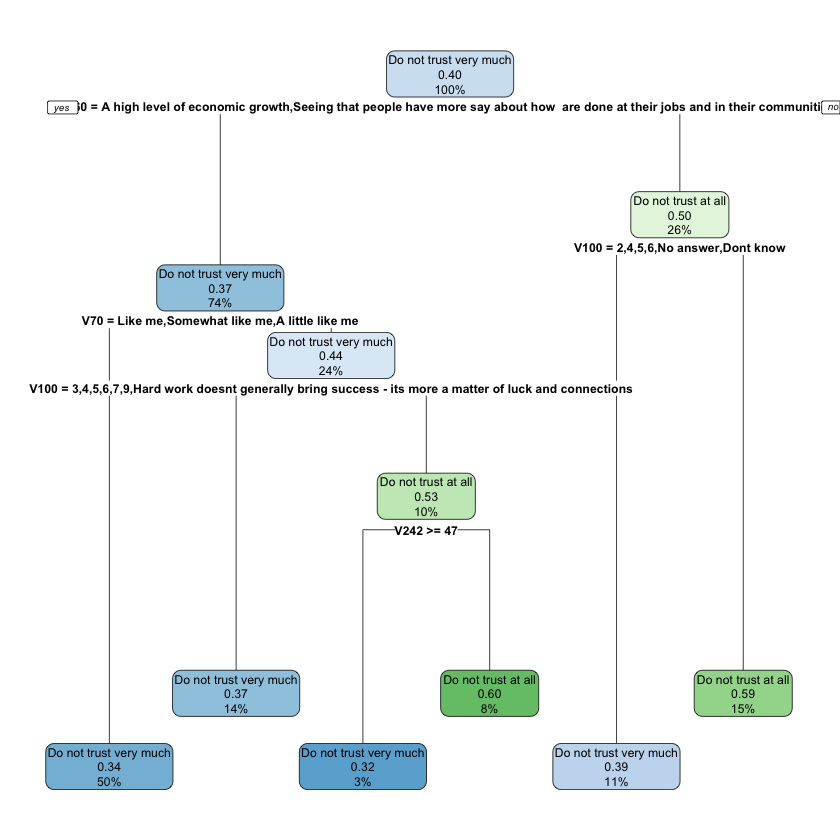

In [17]:
model_rpart <- rpart( V105 ~ V10 + V20 + V30 + V40 + V50 + V60 + V70 + V80 + V90 + V100 + V242, data = train, method = "class")
rpart.plot( model_rpart )

## Support vector machines

Support vector machines similarly are used to create a mechanism to classify content based on variables. Note how you can explore the importance of individual variables using `varImp`.

You can also use advanced techniques to improve the model prediction by **cross-validating** even when doing data analysis. This means that the model is created several times with different splits (folds) of the dataset.

In [13]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [18]:
model_svm <- train( V105 ~ V10 + V20 + V30 + V40 + V50 + V60 + V70 + V80 + V90 + V100 + V242, data=train, method="svmLinear")

Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Vari

In [20]:
varImp( model_svm, scale=TRUE )

ROC curve variable importance

     Importance
V60     100.000
V242     91.875
V40      58.734
V80      53.489
V50      35.805
V70      29.691
V20      19.395
V90       9.127
V10       6.242
V100      5.162
V30       0.000

In [21]:
varImp( model_svm, scale=FALSE )

ROC curve variable importance

     Importance
V60      0.5419
V242     0.5388
V40      0.5262
V80      0.5242
V50      0.5175
V70      0.5152
V20      0.5113
V90      0.5074
V10      0.5064
V100     0.5059
V30      0.5040

## Random forest

In [22]:
model_rf <- train( V105 ~ V10 + V20 + V30 + V40 + V50 + V60 + V70 + V80 + V90 + V100 + V242, data=train, method="rf")

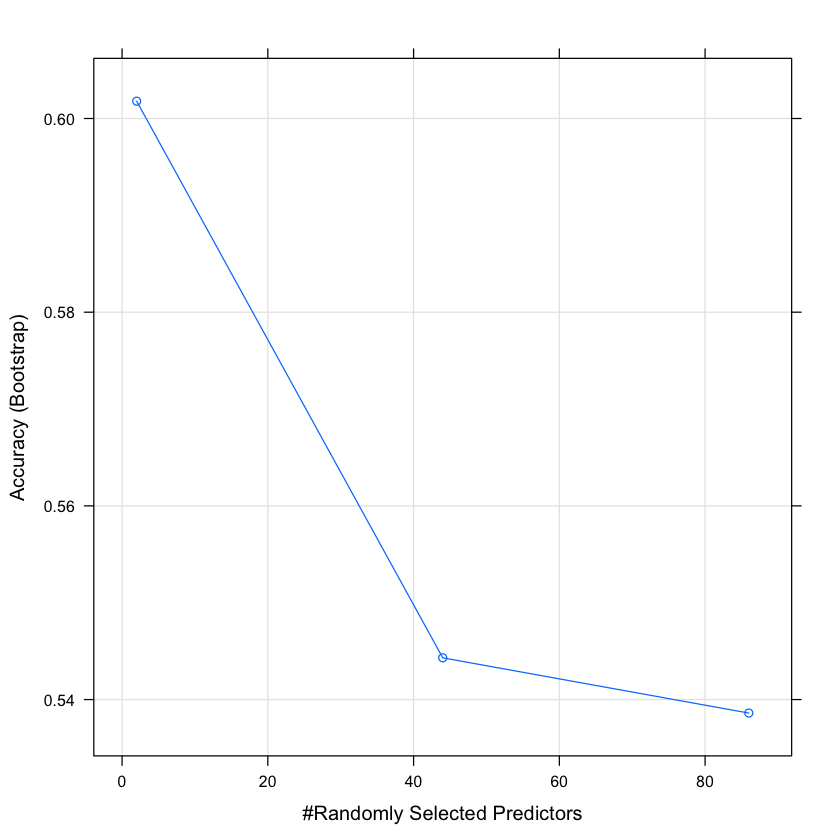

In [25]:
plot( model_rf )

## Evaluating results

Now let's examine how well the models work with unseen test data.

In [26]:
p <- predict( model_rf, test )
confusionMatrix( p, test$V105 )

Confusion Matrix and Statistics

                        Reference
Prediction               Do not trust very much Do not trust at all
  Do not trust very much                    153                  96
  Do not trust at all                         0                   0
                                                
               Accuracy : 0.6145                
                 95% CI : (0.5509, 0.6752)      
    No Information Rate : 0.6145                
    P-Value [Acc > NIR] : 0.5279                
                                                
                  Kappa : 0                     
                                                
 Mcnemar's Test P-Value : <2e-16                
                                                
            Sensitivity : 1.0000                
            Specificity : 0.0000                
         Pos Pred Value : 0.6145                
         Neg Pred Value :    NaN                
             Prevalence : 0.6145           

## Continous variable

Above we worked with dataset that vas nominal, or classified. Let's move to work on dataset that is continous.

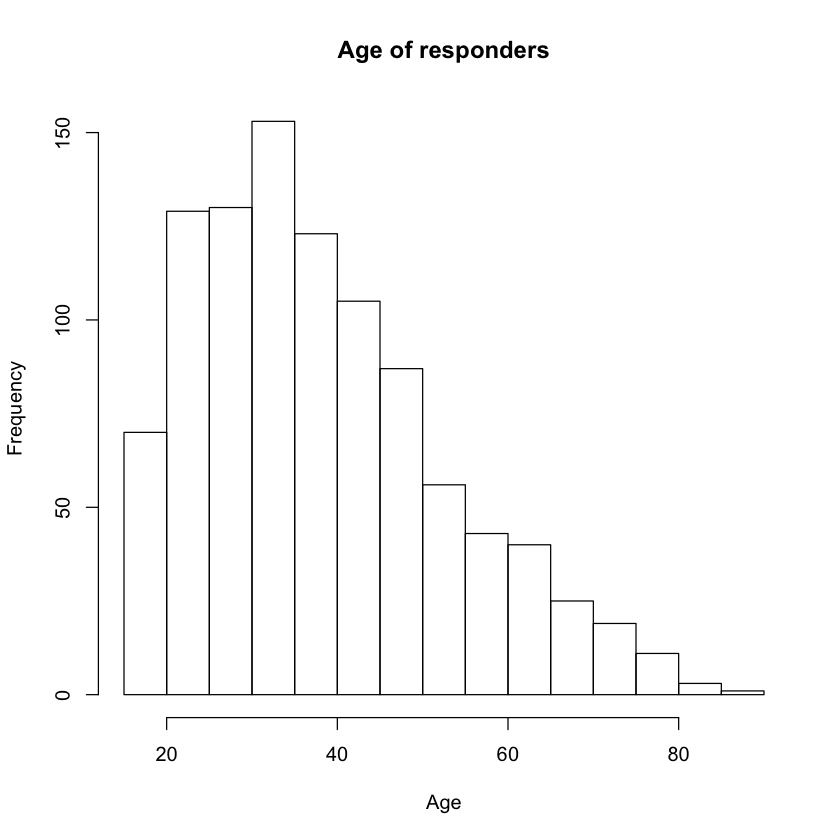

In [32]:
hist( train$V242, xlab = "Age", main = "Age of responders" )

In [57]:
model_lasso <- train( V242 ~ V10 + V20 + V30 , data=train, method="lmStepAIC")

Start:  AIC=5207.41
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V20Dont know` + 
    `V30Inactive member` + `V30Active member` + `V30HT: Dropped out survey;RU:Inappropriate response{Inappropriate}` + 
    `V30Not asked in survey` + `V30Not applicable` + `V30No answer` + 
    `V30Dont know`


Step:  AIC=5207.41
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;D

                       Df Sum of Sq    RSS    AIC
- `V30Active member`    1    132.44 182990 5200.4
<none>                              182858 5201.7
- `V30Inactive member`  1    596.57 183454 5202.9
- `V10Not very happy`   1    615.17 183473 5203.0
- `V30No answer`        1    657.68 183515 5203.2
- `V20Not mentioned`    1   1186.31 184044 5206.1
- `V10Rather happy`     1   1580.70 184438 5208.2

Step:  AIC=5200.37
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V20Not mentioned` + 
    `V30Inactive member` + `V30No answer`

                       Df Sum of Sq    RSS    AIC
<none>                              182990 5200.4
- `V30Inactive member`  1    594.29 183584 5201.6
- `V10Not very happy`   1    616.45 183606 5201.7
- `V30No answer`        1    662.01 183652 5202.0
- `V20Not mentioned`    1   1144.53 184135 5204.6
- `V10Rather happy`     1   1597.36 184587 5207.0
Start:  AIC=5348.44
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Mi


Step:  AIC=5344.58
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10Dont know` + `V20Not mentioned` + `V30Inactive member` + 
    `V30No answer`

                        Df Sum of Sq    RSS    AIC
- `V10Not at all happy`  1     23.46 210704 5342.7
- `V10Not very happy`    1     44.34 210724 5342.8
- `V10Dont know`         1    153.04 210833 5343.3
<none>                               210680 5344.6
- `V30No answer`         1   1279.39 211959 5348.6
- `V30Inactive member`   1   1698.72 212379 5350.6
- `V20Not mentioned`     1   2142.52 212823 5352.6
- `V10Rather happy`      1   2639.66 213320 5355.0

Step:  AIC=5342.69
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Dont know` + 
    `V20Not mentioned` + `V30Inactive member` + `V30No answer`

                       Df Sum of Sq    RSS    AIC
- `V10Not very happy`   1     55.34 210759 5340.9
- `V10Dont know`        1    156.44 210860 5341.4
<none>                              210704 5342.7
- 

                        Df Sum of Sq    RSS    AIC
- `V10Not very happy`    1      3.08 196828 5278.9
- `V10Not at all happy`  1      8.06 196833 5278.9
- `V10Dont know`         1     32.77 196858 5279.1
- `V10No answer`         1     33.49 196859 5279.1
- `V30Active member`     1     38.31 196863 5279.1
- `V30No answer`         1     97.38 196923 5279.4
<none>                               196825 5280.9
- `V30Inactive member`   1    479.64 197305 5281.3
- `V10Rather happy`      1    858.12 197683 5283.2
- `V20Not mentioned`     1   1571.83 198397 5286.8

Step:  AIC=5278.91
.outcome ~ `V10Rather happy` + `V10Not at all happy` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`

                        Df Sum of Sq    RSS    AIC
- `V10Not at all happy`  1      9.89 196838 5277.0
- `V10Dont know`         1     33.55 196862 5277.1
- `V10No answer`         1     34.02 196862 5277.1
- `V30Active member`     1     37.7


Step:  AIC=5300.82
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V30Inactive member` + `V30Active member`


Step:  AIC=5300.82
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V30Inactive member` + `V30Active member`


Step:  AIC=5300.82
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing


Step:  AIC=5275.64
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`


Step:  AIC=5275.64
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V30Inactive member` + `V30Active member` + 
    `V30No answer`


Step:  AIC=5275.64
.outcome ~ `V1


Step:  AIC=5256.59
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V20Dont know` + 
    `V30Inactive member` + `V30Active member` + `V30No answer`


Step:  AIC=5256.59
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V30Inactive member` + 
  


Step:  AIC=5293.23
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V20Dont know` + 
    `V30Inactive member` + `V30Active member` + `V30HT: Dropped out survey;RU:Inappropriate response{Inappropriate}` + 
    `V30No answer`


Step:  AIC=5293.23
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20No


Step:  AIC=5293.39
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V20Dont know` + 
    `V30Inactive member` + `V30Active member` + `V30HT: Dropped out survey;RU:Inappropriate response{Inappropriate}` + 
    `V30Not asked in survey` + `V30Not applicable` + `V30No answer`


Step:  AIC=5293.39
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: In

                        Df Sum of Sq    RSS    AIC
- `V10Not at all happy`  1    131.55 199624 5284.9
- `V30No answer`         1    311.50 199804 5285.8
<none>                               199493 5286.3
- `V10Not very happy`    1    445.13 199938 5286.5
- `V30Inactive member`   1   1076.68 200569 5289.6
- `V10Rather happy`      1   1530.79 201023 5291.9

Step:  AIC=5284.94
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V30Inactive member` + 
    `V30No answer`

                       Df Sum of Sq    RSS    AIC
- `V30No answer`        1    319.60 199944 5284.5
<none>                              199624 5284.9
- `V10Not very happy`   1    535.12 200159 5285.6
- `V30Inactive member`  1   1080.82 200705 5288.3
- `V10Rather happy`     1   1837.21 201461 5292.1

Step:  AIC=5284.53
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V30Inactive member`

                       Df Sum of Sq    RSS    AIC
<none>                              199944 5284.5
- `V10Not very happy`   1    51

                        Df Sum of Sq    RSS    AIC
- `V30Active member`     1    145.03 201795 5299.7
- `V10No answer`         1    275.81 201925 5300.3
- `V30No answer`         1    394.54 202044 5300.9
<none>                               201650 5301.0
- `V10Rather happy`      1    488.59 202138 5301.4
- `V10Not at all happy`  1    640.79 202290 5302.1
- `V30Inactive member`   1    744.21 202394 5302.7
- `V20Not mentioned`     1   1381.69 203031 5305.8

Step:  AIC=5299.7
.outcome ~ `V10Rather happy` + `V10Not at all happy` + `V10No answer` + 
    `V20Not mentioned` + `V30Inactive member` + `V30No answer`

                        Df Sum of Sq    RSS    AIC
- `V10No answer`         1    276.37 202071 5299.1
- `V30No answer`         1    397.13 202192 5299.7
<none>                               201795 5299.7
- `V10Rather happy`      1    514.28 202309 5300.2
- `V10Not at all happy`  1    631.44 202426 5300.8
- `V30Inactive member`   1    738.72 202533 5301.3
- `V20Not mentioned`     1  

                        Df Sum of Sq    RSS    AIC
- `V10Dont know`         1     10.46 212947 5357.2
- `V10Not at all happy`  1     21.37 212958 5357.3
- `V10Not very happy`    1     40.73 212977 5357.4
- `V10No answer`         1     59.83 212997 5357.5
- `V30No answer`         1    144.69 213081 5357.9
- `V30Active member`     1    219.10 213156 5358.2
- `V10Rather happy`      1    316.21 213253 5358.7
<none>                               212937 5359.2
- `V20Not mentioned`     1    633.65 213570 5360.1
- `V30Inactive member`   1   2101.08 215038 5366.9

Step:  AIC=5357.23
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10No answer` + `V20Not mentioned` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`

                        Df Sum of Sq    RSS    AIC
- `V10Not at all happy`  1     22.29 212969 5355.3
- `V10Not very happy`    1     39.09 212986 5355.4
- `V10No answer`         1     59.58 213007 5355.5
- `V30No answer`         1    


Step:  AIC=5293.79
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V30Inactive member` + `V30Active member` + `V30No answer`


Step:  AIC=5293.79
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`


Step:  AIC=5293.79
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    


Step:  AIC=5294.77
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`


Step:  AIC=5294.77
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V30Inactive member` + 
    `V30Active member` + `V30No answ


Step:  AIC=5254.4
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V20Dont know` + 
    `V30Inactive member` + `V30Active member` + `V30No answer`


Step:  AIC=5254.4
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V30Inactive member` + 
    


Step:  AIC=5208.75
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V20Dont know` + 
    `V30Inactive member` + `V30Active member` + `V30HT: Dropped out survey;RU:Inappropriate response{Inappropriate}` + 
    `V30Not asked in survey` + `V30Not applicable` + `V30No answer`


Step:  AIC=5208.75
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: In

                       Df Sum of Sq    RSS    AIC
- `V10Not very happy`   1     90.34 183710 5200.3
- `V20Not mentioned`    1    340.92 183960 5201.6
<none>                              183619 5201.8
- `V10Rather happy`     1    564.33 184184 5202.8
- `V30Inactive member`  1    774.15 184394 5204.0

Step:  AIC=5200.28
.outcome ~ `V10Rather happy` + `V20Not mentioned` + `V30Inactive member`

                       Df Sum of Sq    RSS    AIC
<none>                              183710 5200.3
- `V20Not mentioned`    1    384.24 184094 5200.4
- `V10Rather happy`     1    475.74 184185 5200.9
- `V30Inactive member`  1    778.86 184489 5202.5
Start:  AIC=5279.05
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiat

                       Df Sum of Sq    RSS    AIC
- `V30Active member`    1     58.97 196545 5273.5
- `V10No answer`        1     62.85 196549 5273.5
- `V10Rather happy`     1    232.28 196718 5274.4
<none>                              196486 5275.2
- `V20Not mentioned`    1    477.08 196963 5275.6
- `V10Dont know`        1    485.59 196972 5275.6
- `V30No answer`        1   1487.87 197974 5280.7
- `V30Inactive member`  1   1959.78 198446 5283.1

Step:  AIC=5273.47
.outcome ~ `V10Rather happy` + `V10No answer` + `V10Dont know` + 
    `V20Not mentioned` + `V30Inactive member` + `V30No answer`

                       Df Sum of Sq    RSS    AIC
- `V10No answer`        1     61.67 196607 5271.8
- `V10Rather happy`     1    249.47 196794 5272.7
<none>                              196545 5273.5
- `V10Dont know`        1    482.31 197027 5273.9
- `V20Not mentioned`    1    487.33 197032 5273.9
- `V30No answer`        1   1483.81 198029 5279.0
- `V30Inactive member`  1   1969.01 198514 5281.4



Step:  AIC=5294.99
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10No answer` + `V20Not mentioned` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`

                        Df Sum of Sq    RSS    AIC
- `V10Not very happy`    1     50.37 200086 5293.2
- `V30Active member`     1    155.44 200191 5293.8
- `V10Not at all happy`  1    211.12 200247 5294.0
- `V10No answer`         1    385.51 200421 5294.9
<none>                               200036 5295.0
- `V30Inactive member`   1    412.46 200448 5295.0
- `V30No answer`         1    574.76 200611 5295.8
- `V20Not mentioned`     1    797.23 200833 5296.9
- `V10Rather happy`      1   1557.04 201593 5300.7

Step:  AIC=5293.24
.outcome ~ `V10Rather happy` + `V10Not at all happy` + `V10No answer` + 
    `V20Not mentioned` + `V30Inactive member` + `V30Active member` + 
    `V30No answer`

                        Df Sum of Sq    RSS    AIC
- `V30Active member`     1    147.04 200233 5292.0



Step:  AIC=5368.5
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10No answer` + `V10Dont know` + 
    `V20Not mentioned` + `V30Inactive member` + `V30Active member` + 
    `V30No answer`


Step:  AIC=5368.5
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10No answer` + `V10Dont know` + `V20Not mentioned` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`


Step:  AIC=5368.5
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10No answer` + `V10Dont know` + `V20Not mentioned` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`

                        Df Sum of Sq    RSS    AIC
- `V10Not at all happy`  1     19.82 214961 5366.6
- `V20Not mentioned`     1     


Step:  AIC=5326.23
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V30Inactive member` + `V30Active member` + 
    `V30No answer`


Step:  AIC=5326.23
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V30Inactive member` + `V30Active member` + `V30No answer`


Step:  AIC=5326.23
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10N


Step:  AIC=5275.46
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V20Dont know` + 
    `V30Inactive member` + `V30Active member` + `V30No answer`


Step:  AIC=5275.46
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V30Inactive member` + 
  


Step:  AIC=5330.74
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V20Dont know` + 
    `V30Inactive member` + `V30Active member` + `V30HT: Dropped out survey;RU:Inappropriate response{Inappropriate}` + 
    `V30Not asked in survey` + `V30No answer`


Step:  AIC=5330.74
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{In


Step:  AIC=5322.22
.outcome ~ `V10Rather happy` + `V10Not at all happy` + `V20Not mentioned`

                        Df Sum of Sq    RSS    AIC
- `V10Not at all happy`  1    244.19 207907 5321.4
<none>                               207663 5322.2
- `V10Rather happy`      1    784.10 208447 5324.0
- `V20Not mentioned`     1   2541.02 210204 5332.3

Step:  AIC=5321.39
.outcome ~ `V10Rather happy` + `V20Not mentioned`

                     Df Sum of Sq    RSS    AIC
<none>                            207907 5321.4
- `V10Rather happy`   1    986.07 208893 5324.1
- `V20Not mentioned`  1   2621.42 210528 5331.9
Start:  AIC=5362.95
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
 

                       Df Sum of Sq    RSS    AIC
- `V30No answer`        1     48.40 213802 5357.2
- `V10No answer`        1     53.88 213808 5357.2
- `V10Not very happy`   1     85.33 213839 5357.4
- `V10Dont know`        1    202.66 213956 5357.9
<none>                              213754 5359.0
- `V10Rather happy`     1    459.57 214213 5359.1
- `V20Not mentioned`    1    786.53 214540 5360.6
- `V30Inactive member`  1   1861.17 215615 5365.6

Step:  AIC=5357.21
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V30Inactive member`

                       Df Sum of Sq    RSS    AIC
- `V10No answer`        1     19.93 213822 5355.3
- `V10Not very happy`   1     84.61 213887 5355.6
- `V10Dont know`        1    202.45 214005 5356.2
<none>                              213802 5357.2
- `V10Rather happy`     1    458.20 214260 5357.3
- `V20Not mentioned`    1    813.13 214615 5359.0
- `V30Inactive member`  1   1859.98 215662 53


Step:  AIC=5331.97
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10No answer` + `V10Dont know` + `V20Not mentioned` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`


Step:  AIC=5331.97
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10No answer` + `V10Dont know` + `V20Not mentioned` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`

                        Df Sum of Sq    RSS    AIC
- `V30Active member`     1     35.30 207229 5330.1
- `V10Not very happy`    1     42.05 207236 5330.2
- `V10No answer`         1     51.34 207245 5330.2
- `V10Dont know`         1     51.34 207245 5330.2
- `V30No answer`         1     86.82 207280 5330.4
- `V10Not at all happy`  1    274.39 207468 5331.3
<none>                               207193 5332.0
- `V10Rather happy`      1    524.18 207718 5332.5
- `V30Inact


Step:  AIC=5205.19
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V30Inactive member` + `V30Active member` + 
    `V30No answer`


Step:  AIC=5205.19
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V30Inactive member` + `V30Active member` + `V30No answer`


Step:  AIC=5205.19
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10N


Step:  AIC=5340.32
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V30Inactive member` + 
    `V30Active member` + `V30No answer`


Step:  AIC=5340.32
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V30Inactive member` + `V30Active member` + 
    `V30No answer`


Step:  AIC=5340.32
.outcome ~ `V1


Step:  AIC=5334.98
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V20Dont know` + 
    `V30Inactive member` + `V30Active member` + `V30No answer`


Step:  AIC=5334.98
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V30Inactive member` + 
  


Step:  AIC=5315.8
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}` + 
    `V20Not asked` + `V20Not applicable` + `V20No answer` + `V20Dont know` + 
    `V30Inactive member` + `V30Active member` + `V30HT: Dropped out survey;RU:Inappropriate response{Inappropriate}` + 
    `V30Not asked in survey` + `V30No answer`


Step:  AIC=5315.8
.outcome ~ `V10Rather happy` + `V10Not very happy` + `V10Not at all happy` + 
    `V10HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}` + 
    `V10Not asked in survey` + `V10Not applicable` + `V10No answer` + 
    `V10Dont know` + `V20Not mentioned` + `V20HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inap


Step:  AIC=5305.67
.outcome ~ `V10Rather happy` + `V20Not mentioned` + `V30Inactive member`

                       Df Sum of Sq    RSS    AIC
<none>                              204236 5305.7
- `V20Not mentioned`    1    1101.2 205337 5309.0
- `V30Inactive member`  1    1136.4 205372 5309.2
- `V10Rather happy`     1    1144.8 205380 5309.2


In [59]:
summary( model_lasso )


Call:
lm(formula = .outcome ~ `V10Rather happy` + `V20Not mentioned` + 
    `V30Inactive member`, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.445 -11.128  -2.445   8.872  47.872 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           38.1280     0.9600  39.716   <2e-16 ***
`V10Rather happy`     -2.1541     0.9139  -2.357   0.0186 *  
`V20Not mentioned`     2.3172     1.0024   2.312   0.0210 *  
`V30Inactive member` -11.9789     5.1012  -2.348   0.0191 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.36 on 991 degrees of freedom
Multiple R-squared:  0.0171,	Adjusted R-squared:  0.01412 
F-statistic: 5.746 on 3 and 991 DF,  p-value: 0.0006746


In [61]:
test_lasso <- predict( model_lasso, test )

In [65]:
cor( test_lasso, test$V242 )

[1] 0.07486235

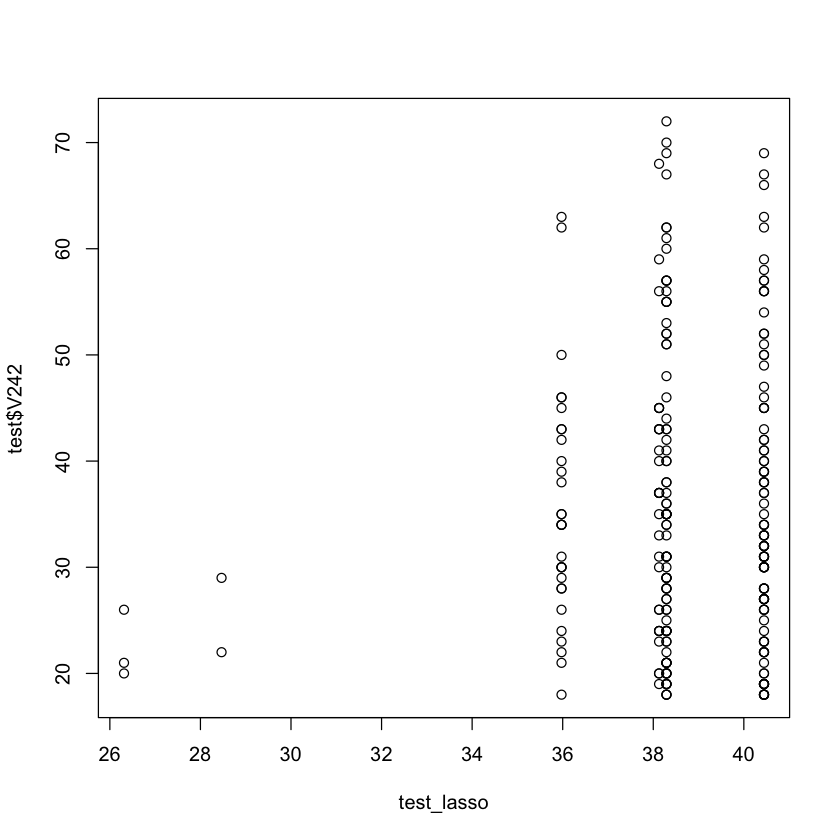

In [66]:
plot( test_lasso, test$V242 )